Tópico	25 – Aplicar a Transformada	de	Watershed em	imagens	tons	de	cinza para	segmentação	de	objetos.
Tópico	da	aula 9.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def Watershed(img, gray):
    # binarização
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # remoção de ruído com a operação de abertura
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
    
    plt.rcParams['figure.figsize'] = (16,10)
    plt.subplot(2, 2, 1)
    plt.imshow(img, 'gray')
    plt.title("Imagem original")

    # Dilatação
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    plt.subplot(2, 2, 2)
    plt.imshow(sure_bg, 'gray')
    plt.title("Abertura (2 iterações) seguida por Dilatação (3 iterações)")
   
    # Área de primeiro plano
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
   
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    # Região desconhecida
    sure_fg = np.uint8(sure_fg)
    # Área desconhecida
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marcação dos marcadores
    ret, markers = cv2.connectedComponents(sure_fg)

    # Adiciona 1 para que o fundo não seja 0 (expande a área segmentada)
    markers = markers + 1
    markers[unknown == 255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [0,255,0]
    # Inserção de zeros na região desconhecida
    plt.subplot(2, 2, 3)
    plt.imshow(markers, 'gray')
    plt.title("Segmentos")

    plt.subplot(2, 2, 4)
    plt.imshow(img, 'gray')
    plt.title("Resultado obtido")
    plt.show()


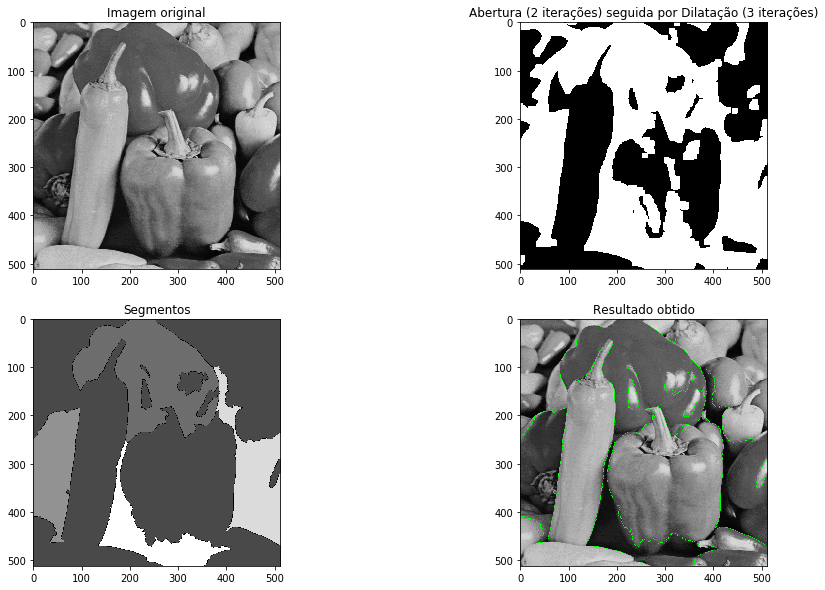

In [3]:
if __name__ == '__main__':
    img = cv2.imread('imagens/peppers_gray.tif')
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Watershed(img, gray)